In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler , MaxAbsScaler ,StandardScaler
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import joblib

In [2]:
df= pd.read_csv("kaggle_diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [4]:
print(df.shape)

(2000, 9)


In [5]:
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
invalid_zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[invalid_zero_cols] = df[invalid_zero_cols].replace(0, pd.NA)

In [9]:
print("\nMissing values per column after replacing zeros:")
print(df.isnull().sum())


Missing values per column after replacing zeros:
Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [21]:
df[invalid_zero_cols] = df[invalid_zero_cols].apply(pd.to_numeric, errors="coerce")
imputer = SimpleImputer(strategy="median")
df[invalid_zero_cols] = imputer.fit_transform(df[invalid_zero_cols])

In [22]:
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [23]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0,35.0,126.0,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,72.0,29.0,126.0,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0


In [24]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [27]:
print("\nScaled data preview:")
print(X_scaled_df.head())


Scaled data preview:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.515394  0.525974      -0.869310       0.631010 -0.177601  0.132630   
1    -1.120495 -1.242888       0.804774       0.192542 -0.189864  0.772550   
2    -1.120495  0.755271      -0.032268      -0.026692 -0.177601  1.607229   
3    -1.120495  0.427704      -0.367085       1.398329  1.343080  1.342914   
4    -0.817945  0.558731      -0.869310       1.288712  4.163696  1.120333   

   DiabetesPedigreeFunction       Age  
0                 -1.063246  1.180424  
1                 -0.735551 -0.856326  
2                  0.491759 -0.177409  
3                 -0.327478 -0.771462  
4                  0.201161 -1.026055  


In [28]:
df['Outcome'].value_counts()
df['Outcome'].value_counts(normalize=True)

,proportion
Outcome,
0,0.658
1,0.342


<Axes: xlabel='Outcome', ylabel='count'>

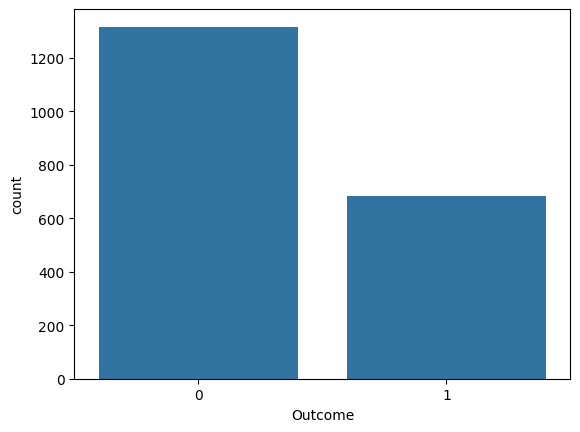

In [29]:
sns.countplot(x='Outcome', data=df)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

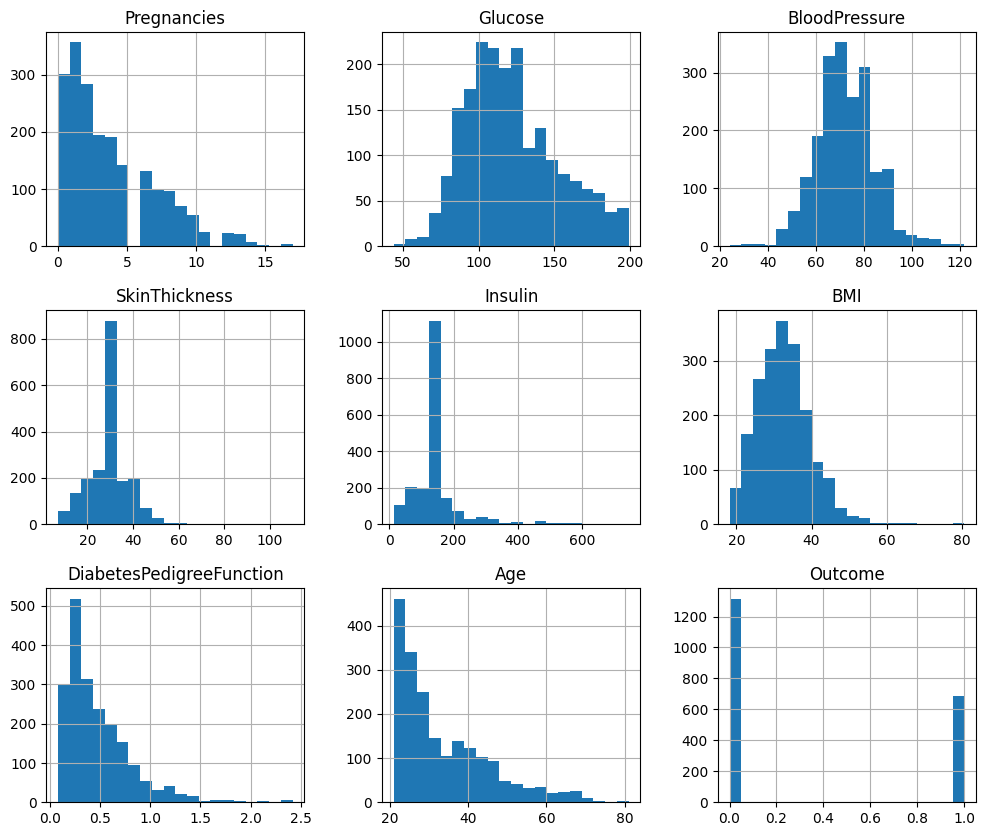

In [30]:
df.hist(figsize=(12, 10), bins=20)

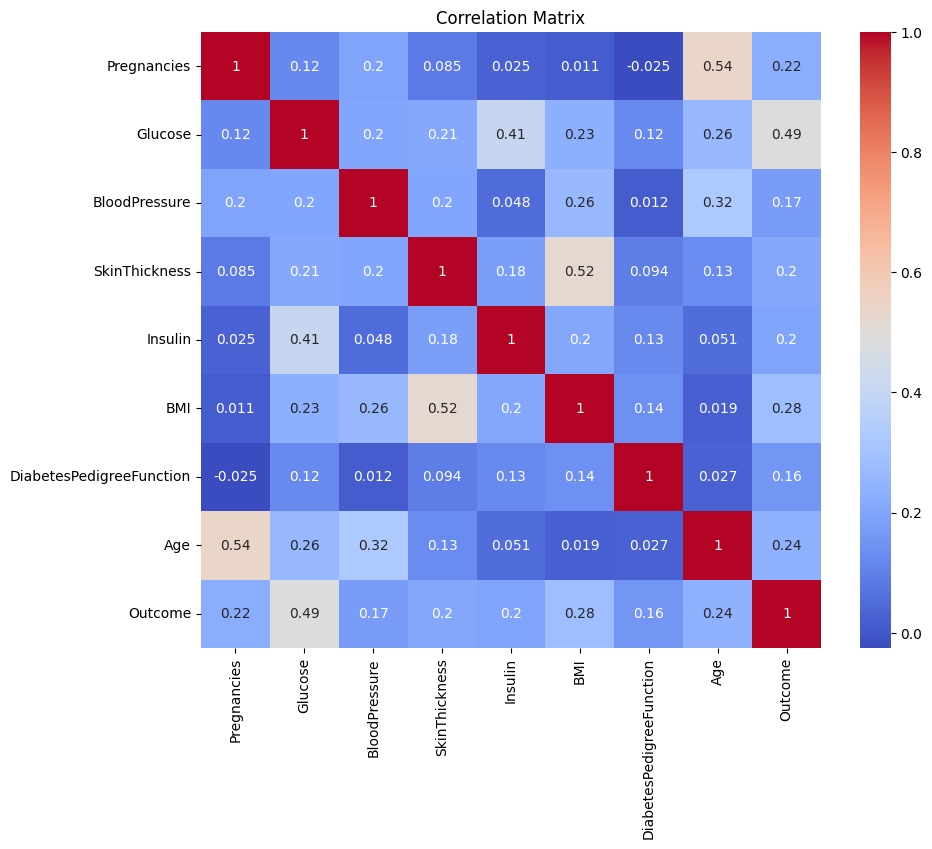

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

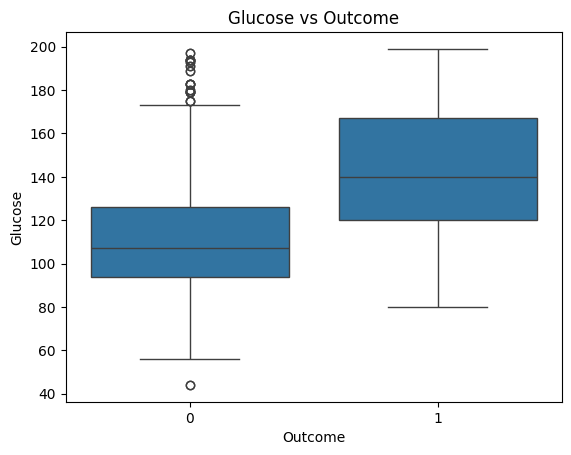

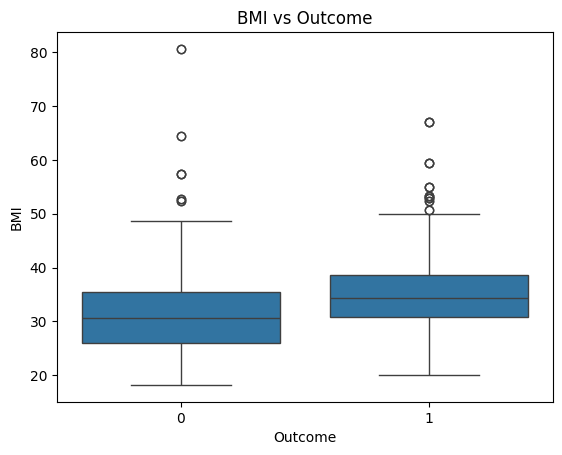

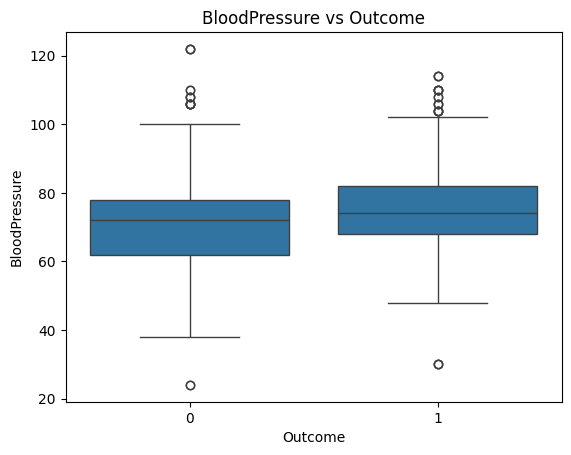

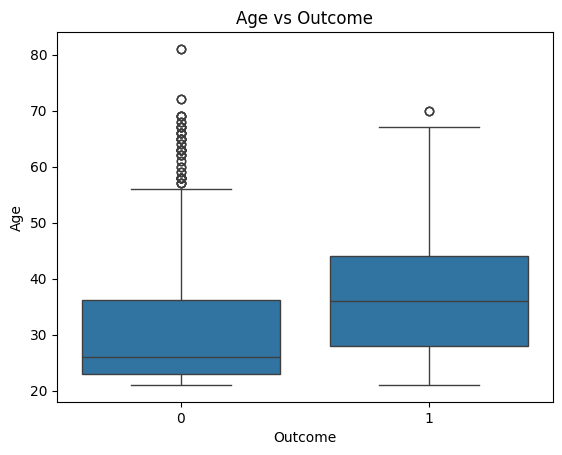

In [32]:
for col in ['Glucose', 'BMI', 'BloodPressure', 'Age']:
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'{col} vs Outcome')
    plt.show()

In [34]:
df.skew()

,0
Pregnancies,0.982366
Glucose,0.515994
BloodPressure,0.219603
SkinThickness,1.311712
Insulin,2.975544
BMI,0.937044
DiabetesPedigreeFunction,1.811979
Age,1.181267
Outcome,0.666633


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42,stratify=y)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Class distribution in y_train:", y_train.value_counts(normalize=True))
print("Class distribution in y_test:", y_test.value_counts(normalize=True))

Training set shape: (1600, 8)
Test set shape: (400, 8)
Class distribution in y_train: Outcome
0    0.658125
1    0.341875
Name: proportion, dtype: float64
Class distribution in y_test: Outcome
0    0.6575
1    0.3425
Name: proportion, dtype: float64


In [39]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [40]:
print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("🔹 Precision:", precision_score(y_test, y_pred))
print("🔹 Recall:", recall_score(y_test, y_pred))
print("🔹 F1 Score:", f1_score(y_test, y_pred))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

🔹 Accuracy: 0.7975
🔹 Precision: 0.7545454545454545
🔹 Recall: 0.6058394160583942
🔹 F1 Score: 0.6720647773279352

🔹 Confusion Matrix:
 [[236  27]
 [ 54  83]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       263
           1       0.75      0.61      0.67       137

    accuracy                           0.80       400
   macro avg       0.78      0.75      0.76       400
weighted avg       0.79      0.80      0.79       400



In [44]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

In [45]:
svm_clf = SVC(kernel='rbf', probability=True)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

In [46]:
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"🔹 {name}")
    print(f"   Accuracy:  {acc:.4f}")
    print(f"   Precision: {prec:.4f}")
    print(f"   Recall:    {rec:.4f}")
    print(f"   F1 Score:  {f1:.4f}\n")
    return {'Model': name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}

In [50]:
results = []

results.append(evaluate_model("Logistic Regression", y_test, y_pred))

results.append(evaluate_model("Random Forest", y_test, y_pred_rf))


results.append(evaluate_model("SVM", y_test, y_pred_svm))

results_df = pd.DataFrame(results)
print("\n Model Comparison:")
print(results_df.sort_values(by="F1 Score", ascending=False))

🔹 Logistic Regression
   Accuracy:  0.7975
   Precision: 0.7545
   Recall:    0.6058
   F1 Score:  0.6721

🔹 Random Forest
   Accuracy:  0.9850
   Precision: 0.9781
   Recall:    0.9781
   F1 Score:  0.9781

🔹 SVM
   Accuracy:  0.8500
   Precision: 0.8182
   Recall:    0.7226
   F1 Score:  0.7674


 Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
1        Random Forest    0.9850   0.978102  0.978102  0.978102
2                  SVM    0.8500   0.818182  0.722628  0.767442
0  Logistic Regression    0.7975   0.754545  0.605839  0.672065


In [52]:




param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}


rf = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           verbose=1,
                           scoring='f1')


grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("🔍 Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
🔍 Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [55]:
y_pred_best = best_rf.predict(X_test)
print("\n Tuned Random Forest Performance:")
print(classification_report(y_test, y_pred_best))


 Tuned Random Forest Performance:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       263
           1       0.97      0.98      0.97       137

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [59]:
joblib.dump(best_rf, "diabetes_best_rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [61]:
model = joblib.load("diabetes_best_rf_model.pkl")
scaler = joblib.load("scaler.pkl")
new_data = np.array([[2, 130, 70, 30, 100, 32.0, 0.5, 45]])
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
print("Prediction:", "Yes" if prediction[0] == 1 else "No")

Prediction: Yes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
